In [1]:
!pip3 install snscrape 

In [1]:
import pandas as pd 

import numpy as np 

import snscrape.modules.twitter as sntwitter 

import seaborn as sns 

import matplotlib.pyplot as plt 

In [4]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('amazon prime since:2023-01-01 until:2023-02-01').get_items()):
    if i>10000: #number of tweets you want to scrape
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.rawContent])
    
# Creating a dataframe to load the list
tweets_prime = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

In [5]:
print(tweets_prime.shape)

(10001, 5)


In [6]:
tweets_prime.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...
1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...
2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...
3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...
4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...


In [42]:
tweets_prime.to_csv('Tweets_AmazonPrime.csv',index=False)

In [44]:
# Reading Data
tweets_prime = pd.read_csv('Tweets_AmazonPrime.csv')

In [45]:
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [46]:
# Checking for NA Values
tweets_prime.isnull().sum()

Unnamed: 0         0
User               0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
dtype: int64

In [47]:
tweets_prime["Tweet"] = tweets_prime["Tweet"].astype(str)

In [48]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
#defining the function to remove punctuation
def remove_punctuation(Tweet):
    punctuationfree="".join([i for i in Tweet if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free Tweet
tweets_prime['preprocess_Tweet']= tweets_prime['Tweet'].apply(lambda x:remove_punctuation(x))
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,💫 Divido Mensalidade\n\n→ 🟣 HBO Max 11 Reais\n...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,Soy a la unica que amazon prime desde la compu...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,💫 Divido Mensalidade\n\n→ 🟣 HBO Max 11 Reais\n...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござい...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,\nFREE via KindleUnlimited eBook\nAvail in Pri...


In [50]:
tweets_prime['preprocess_Tweet']= tweets_prime['preprocess_Tweet'].apply(lambda x: x.lower())
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\n...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,soy a la unica que amazon prime desde la compu...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\n...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,zuyozu4 amazonです。amazon prime musicのご利用に問題がござい...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,\nfree via kindleunlimited ebook\navail in pri...


In [51]:
#defining function for tokenization
import re
def tokenization(Tweet):
    tokens = re.split('W+',Tweet)
    return tokens
#applying function to the column
tweets_prime['preprocess_Tweet']= tweets_prime['preprocess_Tweet'].apply(lambda x: tokenization(x))
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,[💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,[soy a la unica que amazon prime desde la comp...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,[💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,[zuyozu4 amazonです。amazon prime musicのご利用に問題がござ...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,[\nfree via kindleunlimited ebook\navail in pr...


In [52]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [53]:
#defining the function to remove stopwords from tokenized Tweet
def remove_stopwords(Tweet):
    output= [i for i in Tweet if i not in stopwords]
    return output
#applying the function
tweets_prime['preprocess_Tweet']= tweets_prime['preprocess_Tweet'].apply(lambda x:remove_stopwords(x))
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,[💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,[soy a la unica que amazon prime desde la comp...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,[💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,[zuyozu4 amazonです。amazon prime musicのご利用に問題がござ...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,[\nfree via kindleunlimited ebook\navail in pr...


In [54]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(Tweet):
    stem_Tweet = [porter_stemmer.stem(word) for word in Tweet]
    return stem_Tweet
tweets_prime['preprocess_Tweet']=tweets_prime['preprocess_Tweet'].apply(lambda x: stemming(x))
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,[💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,[soy a la unica que amazon prime desde la comp...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,[💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,[zuyozu4 amazonです。amazon prime musicのご利用に問題がござ...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,[\nfree via kindleunlimited ebook\navail in pr...


In [55]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(Tweet):
    lemm_Tweet = [wordnet_lemmatizer.lemmatize(word) for word in Tweet]
    return lemm_Tweet
tweets_prime['preprocess_Tweet']=tweets_prime['preprocess_Tweet'].apply(lambda x:lemmatizer(x))
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,[💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,[soy a la unica que amazon prime desde la comp...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,[💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,[zuyozu4 amazonです。amazon prime musicのご利用に問題がござ...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,[\nfree via kindleunlimited ebook\navail in pr...


In [56]:
def get_sentence(words):
    #print(words)
    sentence = ' '.join(words)
    #print(sentence)
    return sentence

tweets_prime['preprocess_Tweet']=tweets_prime['preprocess_Tweet'].apply(lambda x: get_sentence(x))
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\n...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,soy a la unica que amazon prime desde la compu...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,💫 divido mensalidade\n\n→ 🟣 hbo max 11 reais\n...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,zuyozu4 amazonです。amazon prime musicのご利用に問題がござい...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,\nfree via kindleunlimited ebook\navail in pri...


In [57]:
!pip install demoji

In [58]:
import demoji
demoji.download_codes()
def remove_emoji(text):
    dem = demoji.findall(text)
    for item in dem.keys():
        text = text.replace(item, '')
    return text

C:\Users\HP\AppData\Local\Temp\ipykernel_12400\2089779934.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [59]:
#applying function to the column
tweets_prime['preprocess_Tweet']= tweets_prime['preprocess_Tweet'].apply(lambda x: remove_emoji(x))
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,divido mensalidade\n\n→ hbo max 11 reais\n→ ...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,soy a la unica que amazon prime desde la compu...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,divido mensalidade\n\n→ hbo max 11 reais\n→ ...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,zuyozu4 amazonです。amazon prime musicのご利用に問題がござい...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,\nfree via kindleunlimited ebook\navail in pri...


In [60]:
!pip install Tweetblob

ERROR: Could not find a version that satisfies the requirement Tweetblob (from versions: none)
ERROR: No matching distribution found for Tweetblob


In [61]:
!pip install wordcloud

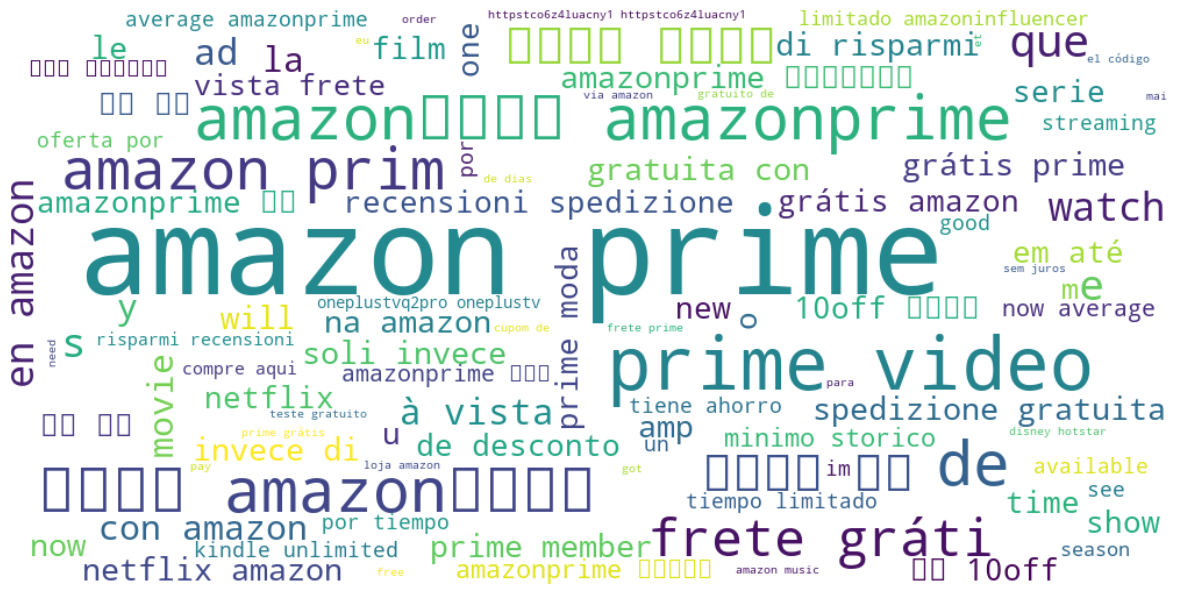

In [62]:
from wordcloud import WordCloud, STOPWORDS
text=" ".join(i for i in tweets_prime.preprocess_Tweet)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,divido mensalidade\n\n→ hbo max 11 reais\n→ ...
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,soy a la unica que amazon prime desde la compu...
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,divido mensalidade\n\n→ hbo max 11 reais\n→ ...
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,zuyozu4 amazonです。amazon prime musicのご利用に問題がござい...
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,\nfree via kindleunlimited ebook\navail in pri...


In [64]:
from textblob import TextBlob

In [65]:
#Create a function to get the polarity
def getPolarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

In [66]:
tweets_prime['polarity']=tweets_prime['preprocess_Tweet'].apply(getPolarity)
tweets_prime.sample(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet,polarity
5308,5308,KeepinItGee__,2023-01-30 16:55:59+00:00,0,Twitter for iPhone,Amazon always deliver my stuff super early wit...,amazon always deliver my stuff super early wit...,0.216667
7662,7662,__twoteezplease,2023-01-30 03:51:52+00:00,2,Twitter for iPhone,Amazon Prime don’t be priming like it used to ...,amazon prime don’t be priming like it used to ...,0.000000
4899,4899,SophianF,2023-01-30 18:39:10+00:00,12,Twitter for Android,"Sur Amazon Prime, il y a les infos de chaque c...",sur amazon prime il y a les infos de chaque ch...,0.000000
1433,1433,h1ra1cuIts,2023-01-31 15:55:24+00:00,0,Twitter for iPhone,@k1IIir AMAZON PRIME IN 80???? meri baat karwao,k1iiir amazon prime in 80 meri baat karwao,0.000000
3192,3192,KokoLdZ,2023-01-31 04:49:07+00:00,1,Twitter for Android,"me fascina la opción d X-Ray d Amazon Prime, e...",me fascina la opción d xray d amazon prime eso...,0.000000


In [67]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
tweets_prime['sentiment']=tweets_prime['polarity'].apply(getAnalysis)
tweets_prime.sample(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet,polarity,sentiment
3476,3476,katajun55,2023-01-31 02:47:20+00:00,20,Twitter for iPhone,世のスピマスオーナーが年1、いや毎月観るべきアポロ13がAmazon primeで月替わりセ...,世のスピマスオーナーが年1、いや毎月観るべきアポロ13がamazon primeで月替わりセ...,0.00,Neutral
1479,1479,rrARR3e4gfG90Re,2023-01-31 15:41:30+00:00,0,Twitter Web App,【ルパン三世VSキャッツ・アイ】\n\nルパン三世アニメ化50周年記念\nキャッツ・アイアニ...,【ルパン三世vsキャッツ・アイ】\n\nルパン三世アニメ化50周年記念\nキャッツ・アイアニ...,0.00,Neutral
363,363,JosiPromocao,2023-01-31 21:56:12+00:00,1,Twitter Web App,🚚FRETE GRÁTIS🚚 (AMAZON PRIME)\nSabonete Demaqu...,frete grátis amazon prime\nsabonete demaquilan...,0.00,Neutral
1186,1186,skeeterJerkins,2023-01-31 17:18:26+00:00,1,Twitter for iPhone,Phantom Farm only on Prime 02/15/23!! #paranor...,phantom farm only on prime 021523 paranormal f...,0.00,Neutral
8496,8496,chrisgrinnan1,2023-01-29 22:30:58+00:00,0,Twitter for iPhone,Jeffery Dean Morgan has joined the cast of Ama...,jeffery dean morgan has joined the cast of ama...,0.25,Positive


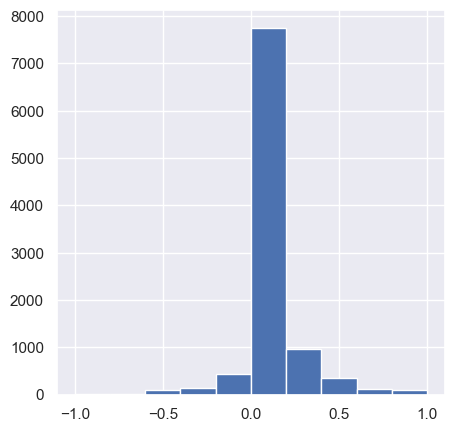

In [68]:
sns.set(rc={'figure.figsize':(5,5)})
tweets_prime['polarity'].hist()
plt.show()

In [69]:
# Segrating based on different sentiments
tweets_prime_negative = tweets_prime[tweets_prime["sentiment"]=='Negative']
tweets_prime_positive = tweets_prime[tweets_prime["sentiment"]=='Positive']
tweets_prime_neutral = tweets_prime[tweets_prime["sentiment"]=='Neutral']

In [70]:
# Distribution of different classes in sentiment
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(tweets_prime,"sentiment")

,Total,Percentage
Neutral,6927,69.26
Positive,2357,23.57
Negative,717,7.17


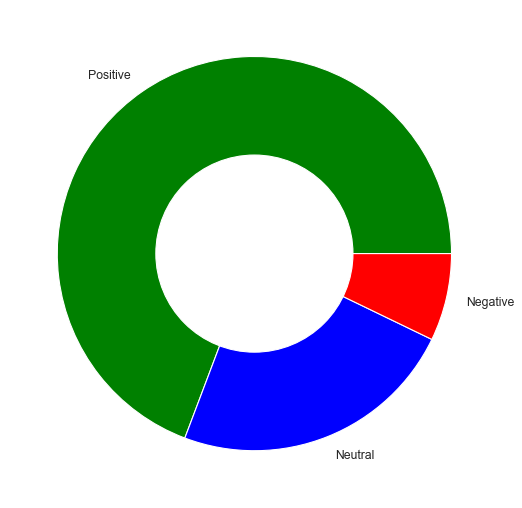

In [71]:
# create data for Pie Chart
plt.figure(figsize=(13, 8), dpi=80)
pichart = count_values_in_column(tweets_prime,"sentiment")
names= ["Positive","Neutral","Negative"]
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


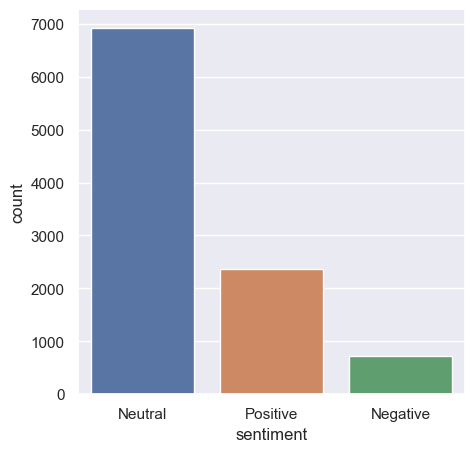

In [72]:
sns.countplot(data=tweets_prime, x="sentiment")
plt.show()

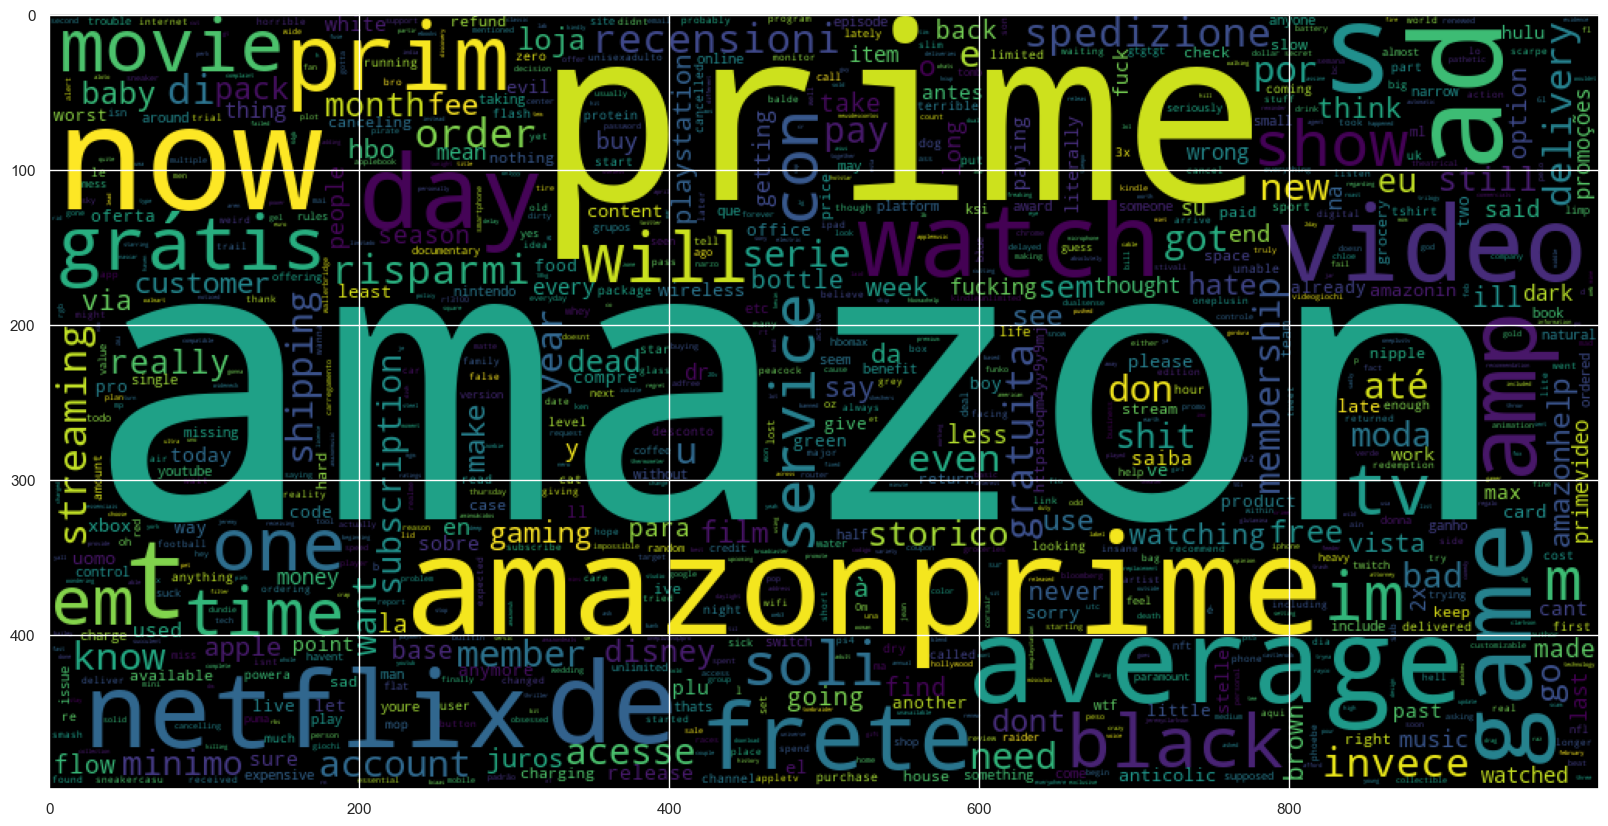

In [73]:
data_neg = tweets_prime_negative['preprocess_Tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 500,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

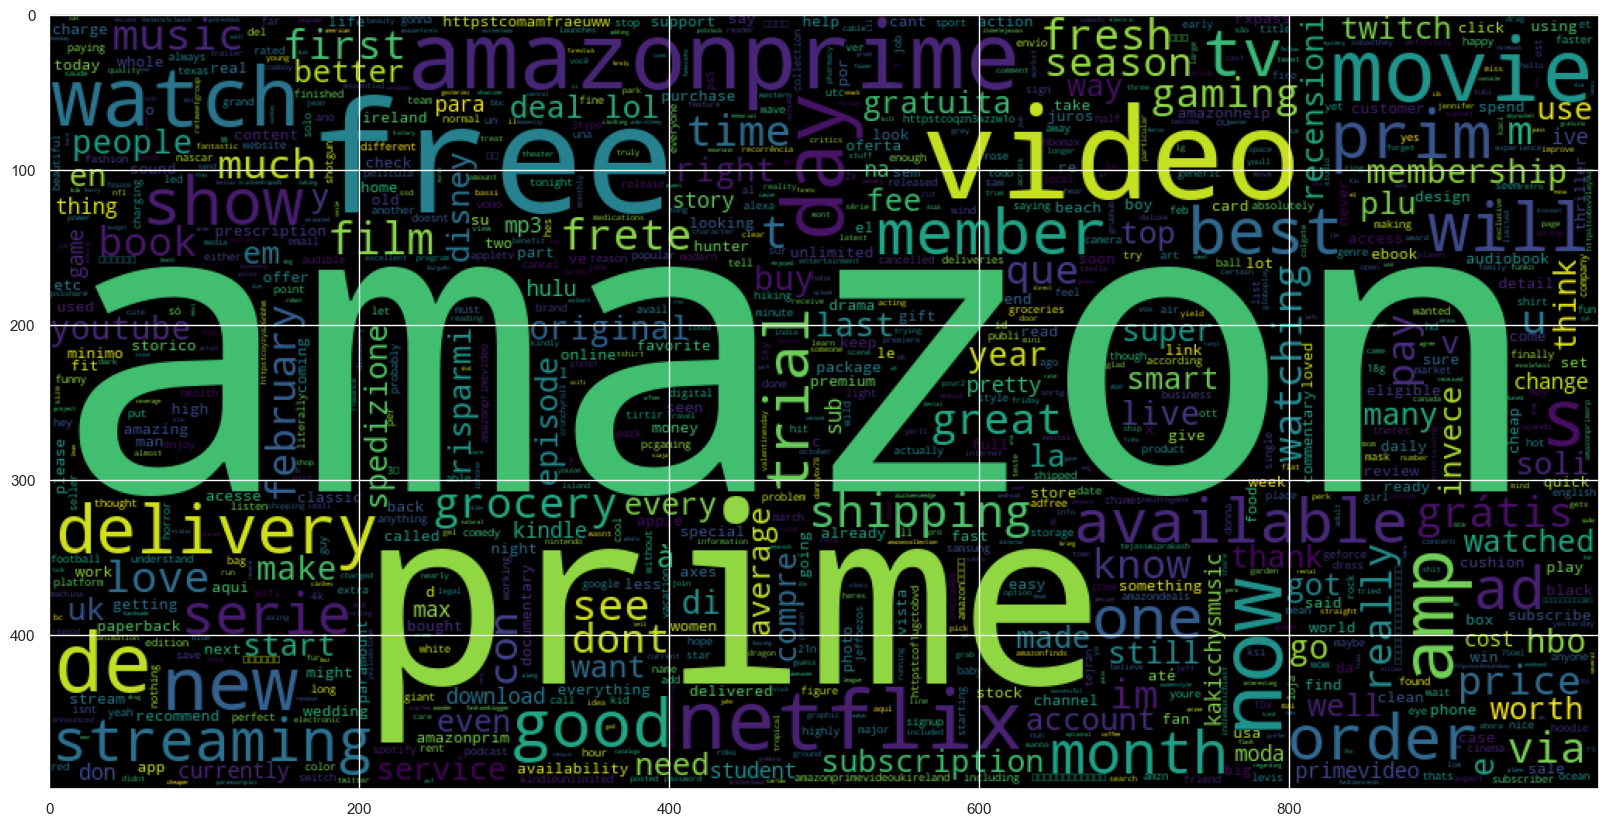

In [74]:
data_pos = tweets_prime_positive['preprocess_Tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 500,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.show()

In [75]:
def getSubjectivity(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity

In [76]:
tweets_prime['subjectivity']=tweets_prime['preprocess_Tweet'].apply(getSubjectivity)
tweets_prime.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet,polarity,sentiment,subjectivity
0,0,vendedorplus,2023-01-31 23:59:22+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,divido mensalidade\n\n→ hbo max 11 reais\n→ ...,0.00,Neutral,0.000
1,1,mixlaliter,2023-01-31 23:59:08+00:00,0,Twitter Web App,Soy a la unica que amazon prime desde la compu...,soy a la unica que amazon prime desde la compu...,0.00,Neutral,0.000
2,2,humildestream,2023-01-31 23:58:49+00:00,1,Twitter for iPhone,💫 Divido Mensalidade!\n\n→ 🟣 HBO Max: 11 Reais...,divido mensalidade\n\n→ hbo max 11 reais\n→ ...,0.00,Neutral,0.000
3,3,AmazonHelp,2023-01-31 23:58:47+00:00,0,Sprinklr,@zuyozu4 Amazonです。Amazon Prime Musicのご利用に問題がござ...,zuyozu4 amazonです。amazon prime musicのご利用に問題がござい...,0.00,Neutral,0.000
4,4,BizMarketplace,2023-01-31 23:58:01+00:00,1,SocialBee,.\n#FREE via #KindleUnlimited #eBook\nAvail in...,\nfree via kindleunlimited ebook\navail in pri...,0.48,Positive,0.705


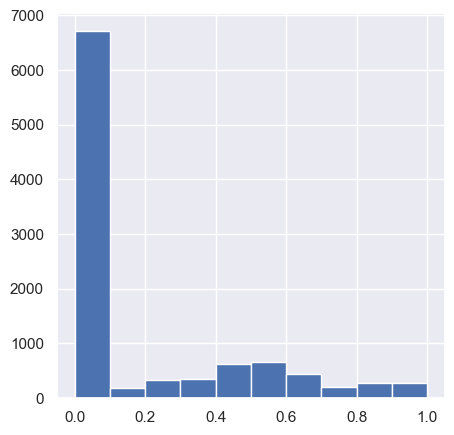

In [77]:
sns.set(rc={'figure.figsize':(5,5)})
tweets_prime['subjectivity'].hist()
plt.show()

In [78]:
tweets_prime.to_excel('AmazonTweets_SentimentAnalysis.xlsx',index=False)

In [79]:
# Reading Data
tweets_prime = pd.read_excel('AmazonTweets_SentimentAnalysis.xlsx')
print(tweets_prime.shape)

(10001, 10)


In [80]:
tweets_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10001 non-null  int64  
 1   User              10001 non-null  object 
 2   Date Created      10001 non-null  object 
 3   Number of Likes   10001 non-null  int64  
 4   Source of Tweet   10001 non-null  object 
 5   Tweet             10001 non-null  object 
 6   preprocess_Tweet  10001 non-null  object 
 7   polarity          10001 non-null  float64
 8   sentiment         10001 non-null  object 
 9   subjectivity      10001 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 781.5+ KB


In [81]:
tweets_prime.sample(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet,polarity,sentiment,subjectivity
7437,7437,JK6MYwhPJeDSJqI,2023-01-30 05:23:18+00:00,0,ウェブ情報システム,TCL 32型 フルハイビジョン スマートテレビ(Android TV) 32S5200A ...,tcl 32型 フルハイビジョン スマートテレビandroid tv 32s5200a am...,0.0,Neutral,0.00
9905,9905,Atariajanaku2,2023-01-29 15:16:05+00:00,1,Twitter for Android,@Sylviaoluchy @AmazonPrime @jadeosiberu Nollyw...,sylviaoluchy amazonprime jadeosiberu nollywood...,0.3,Positive,0.55
2594,2594,boriswapgeek,2023-01-31 10:00:53+00:00,0,IFTTT,Amazon Prime Video en février 2023 : les Minio...,amazon prime video en février 2023 les minion...,0.0,Neutral,0.00
4109,4109,mplshipster,2023-01-30 22:48:56+00:00,4,Twitter for Android,@StarTribune Amazon raised prices on their Pri...,startribune amazon raised prices on their prim...,0.0,Neutral,0.00
7918,7918,calkai123,2023-01-30 02:12:28+00:00,0,Twitter Web App,【#Amazon 売れ筋ランキング第8位】 #アマゾン #Amazonプライム #Amazo...,【amazon 売れ筋ランキング第8位】 アマゾン amazonプライム amazonpri...,0.2,Positive,0.20
